In [1]:
import numpy as np
import cupy as cp
from numba import jit, prange
import timeit
import matplotlib.pyplot as plt

In [2]:
def col_base(a, b):
    c = np.add(a[:,0], b)

def col_cp(a, b):
    c = cp.add(a[:,0], b)
    
@jit(nopython=True)
def col_nb(a, b):
    c = np.add(a[:,0], b)
    
@jit(nopython=True, parallel=True)
def col_nb_parallel(a, b):
    c = np.add(a[:,0], b)
    
def row_base(a, b):
    c = np.add(a[0,:], b)

def row_cp(a, b):
    c = cp.add(a[0,:], b)
    
@jit(nopython=True)
def row_nb(a, b):
    c = np.add(a[0,:], b)
    
@jit(nopython=True, parallel=True)
def row_nb_parallel(a, b):
    c = np.add(a[0,:], b)

In [3]:
# n = 100
# a = np.random.rand(n, 20)
# b = np.random.rand(n)
# row_nb_parallel(a.T,b)
# row_nb_parallel.parallel_diagnostics(level=4)

In [4]:
N = [int(8*2**i) for i in range(20)]
methods = ["col_base", "col_cp", "col_nb", "col_nb_parallel", "row_base", "row_cp", "row_nb", "row_nb_parallel"]
K = len(methods)
funcs = [col_base, col_cp, col_nb, col_nb_parallel, row_base, row_cp, row_nb, row_nb_parallel]
masks = [1, 1, 1, 1, 1, 1, 1, 1]
groups = [0, 1, 0, 1, 0, 1, 0, 1]
T = [[] for i in range(K)]
for n in N:
    print("Start with size:", n)
    a = np.random.rand(n, 20)
    b = np.random.rand(n)
    ca = cp.array(a)
    cb = cp.array(b)
    
    args = [(a,b), (ca,cb), (a,b), (a,b), (a.T,b), (ca.T,cb), (a.T,b), (a.T,b)]
    
    for i in range(K):
        t = %timeit -q -n 1 -r 3 -o funcs[i](*args[i])
        T[i].append(t.average*1000)

Start with size: 8
Start with size: 16
Start with size: 32
Start with size: 64
Start with size: 128
Start with size: 256
Start with size: 512
Start with size: 1024
Start with size: 2048
Start with size: 4096
Start with size: 8192
Start with size: 16384
Start with size: 32768
Start with size: 65536
Start with size: 131072
Start with size: 262144
Start with size: 524288
Start with size: 1048576
Start with size: 2097152
Start with size: 4194304


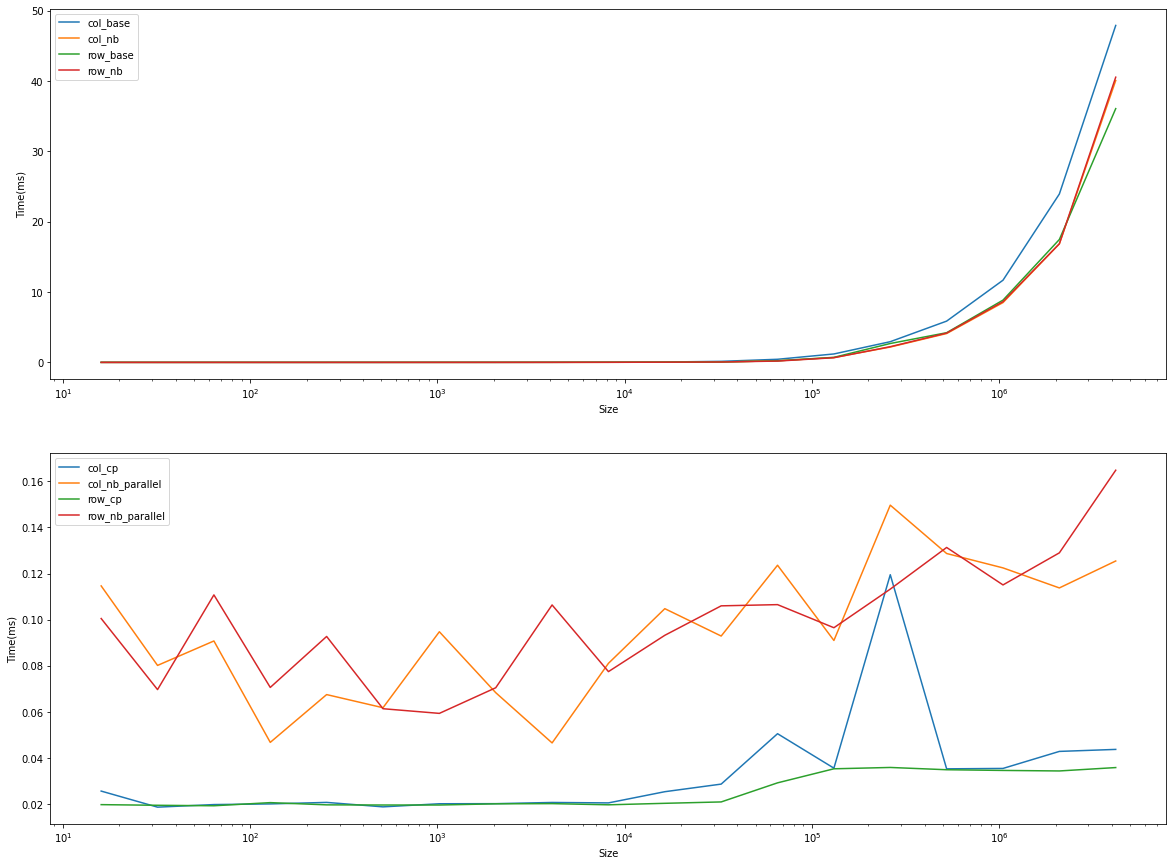

In [7]:
n_groups = max(groups)+1
fig, axs = plt.subplots(n_groups)
plt.rcParams["figure.figsize"] = (10,15)
for g in range(n_groups):
    for i in range(K):
        if masks[i] and groups[i] == g:
            axs[g].plot(N[1:], T[i][1:], label=methods[i])
    axs[g].set_xlabel("Size")
    axs[g].set_ylabel("Time(ms)")
    axs[g].legend()
    axs[g].set_xscale('log')
plt.show()